In [1]:
# 上位インポート先を追加
import os,sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '..'))

from sentinelimagerest.sentinelimagerest import SentinelImageREST

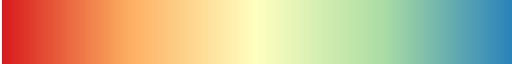

In [2]:
# VI値を表現するカラーパレットの作成

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def gen_cmap_rgb(cols):
    nmax = float(len(cols)-1)
    cdict = {'red':[], 'green':[], 'blue':[]}
    for n, c in enumerate(cols):
        loc = n/nmax
        cdict['red'  ].append((loc, c[0], c[0]))
        cdict['green'].append((loc, c[1], c[1]))
        cdict['blue' ].append((loc, c[2], c[2]))
    my_cmap = mpl.colors.LinearSegmentedColormap('cmap', cdict)
    func_cmap = lambda x : my_cmap(x)
    my_cmap = func_cmap(np.arange(my_cmap.N))
    my_cmap[0] = ((1, 1, 1, 0))
    return ListedColormap(my_cmap)

# カラーパレットをRGB値で記述（下記の例はQGIS　spectralと同一パレット）
red = (215,25,28)
orange = (253,174,97)
yellow = (255,255,191)
green = (171,221,164)
blue = (42,131,186)
color_pallet = [red,orange,yellow,green,blue]

my_cmap = gen_cmap_rgb(list(map(lambda x: tuple(map(lambda y: y/255,x)),color_pallet)))
my_cmap

In [3]:
# 画像取得したいポリゴン座標
coords = [[
    [141.532745,42.983993],
    [141.532745,42.998056],
    [141.567507,42.998056],
    [141.567507,42.983993],
    [141.532745,42.983993]
]]

field_name = 'usage_rest'
# 対象期間（開始）
start_date ='2022-04-15'
# 対象期間（終了）
end_date = '2022-10-15'
# 雲被覆率フィルタリングの上限値
cloudy_pixel_percentage_limit = 25
# 出力先フォルダ（相対パス）
output_dir = './'


# SentinelImageRESTクラスオブジェクトの作成
obj = SentinelImageREST(coords, start_date, end_date, cloudy_pixel_percentage_limit,output_dir,field_name)

# 対象圃場の衛星データ撮影日をリストで取得
shootingdate_list = obj.get_shootingdate_list()
print(shootingdate_list)

['2022-05-17', '2022-06-21', '2022-08-25', '2022-09-04', '2022-09-09', '2022-09-14', '2022-10-09', '2022-10-14']


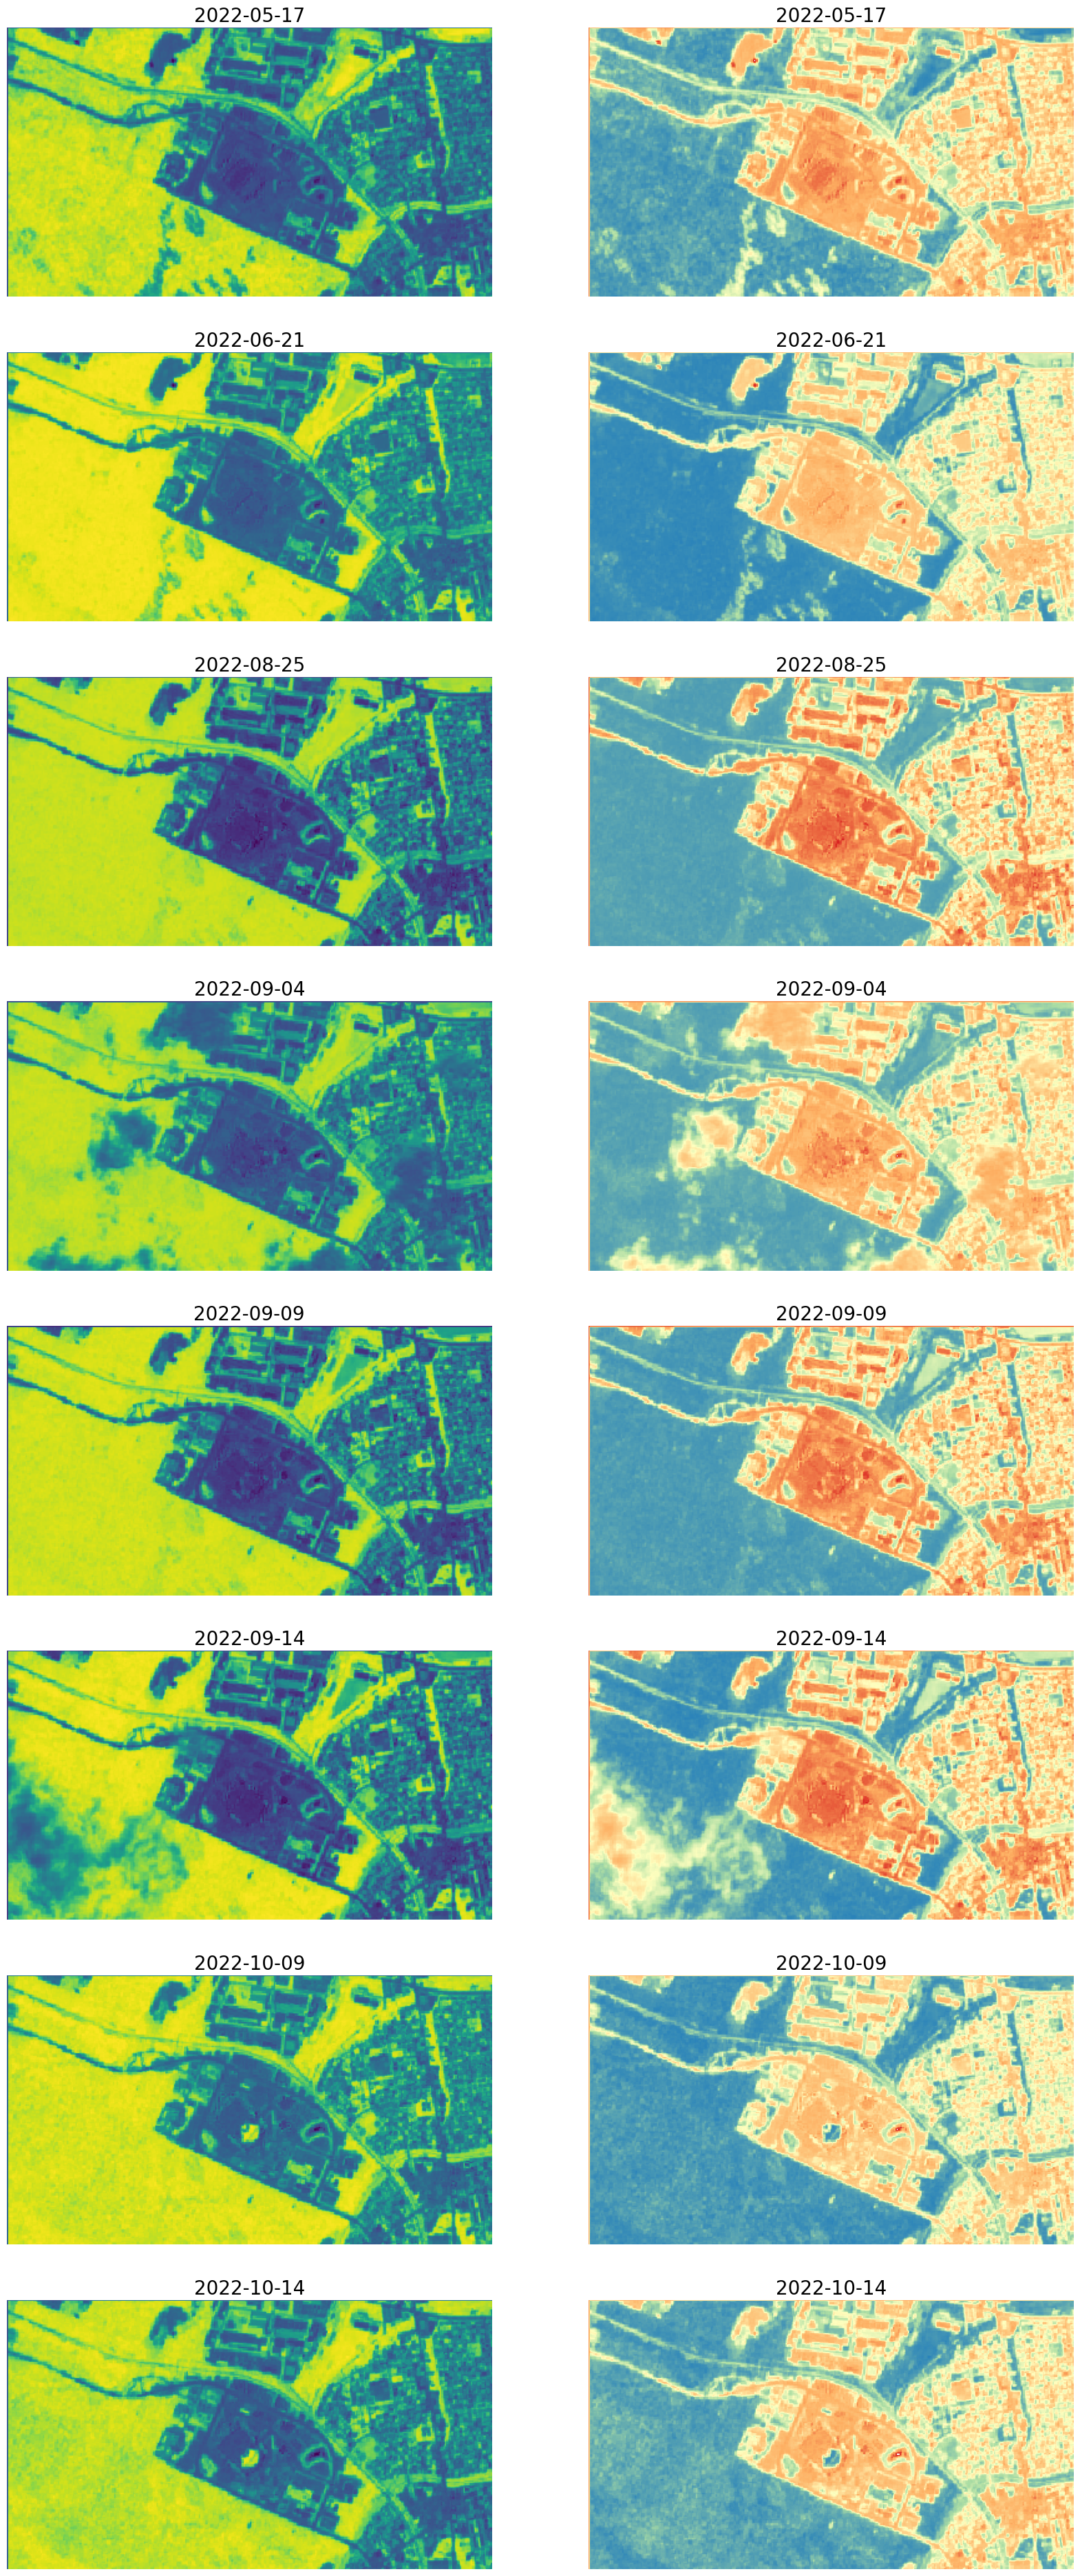

In [4]:
import math
import matplotlib.pyplot as plt

shootingdate_list_length = len(shootingdate_list)
vertical_length = math.ceil(shootingdate_list_length)
# vertical_length = math.ceil(shootingdate_list_length/2)
plt.figure(figsize=(20,vertical_length*6))

cnt = 0

for idx, shootingdate in enumerate(shootingdate_list):
    
    cnt += 1

    plt.subplot(vertical_length,2,cnt)
    plt.title(shootingdate,fontsize=20)
    plt.axis('off')

    img = obj.get_numpy_ndvi_for_matplotlib(shootingdate)
    plt.imshow(img)

    cnt += 1

    plt.subplot(vertical_length,2,cnt)
    plt.title(shootingdate,fontsize=20)
    plt.axis('off')

    img = obj.get_numpy_ndvi_for_matplotlib(shootingdate)
    plt.imshow(img,cmap=my_cmap)